# Continuous Control

---

The notebook shows how you can train both DDPG and TD3 agents to 'solve' the Reacher Unity environment. It is the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Setup the environment

If you've not already done so, read the README Getting started section to set up the environment

### Training the DDPG agent

An agent cant be trained from a notebook or from the command line (using run_agent.py).

Be aware that training an agent can take a long time. You may want to see a trained agent in action first.

Skip to 'Testing the agent' if that's what you want to do.


In [1]:
from lib.environments import UnityEnv
from lib.ddpg_agent import DDPG_Agent
from lib.td3_agent import TD3_Agent


from run_agent import *


In [1]:

train_mode = True

name = 'Reacher_DDPG'

env = UnityEnv('Reacher', '../../Reacher.app', train_mode=train_mode)
agent = DDPG_Agent(name=name,
                   state_size=env.state_size,
                   action_size=env.action_size,
                   random_seed=2)

train_agent(env, agent, max_steps=int(1e6))
                 

### View episode scores during training
The scores of episodes during training are stored in a csv, which can be loaded using pandas.

Please note that the name of the results csv is the same (excluding the extension) as the name of the agent supplied when training. So if the name of the agent is `Reacher_DDPG` the state will be stored in `Reacher_DDPG.pth` and the results during training will be stored in `Reacher_DDPG.csv` 

An average score of 30+ is achieved after 480000 steps


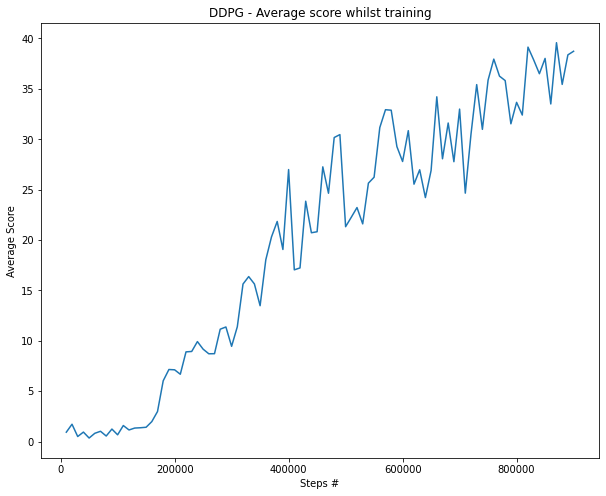

In [12]:

import pandas as pd

df = pd.read_csv('Reacher_DDPG_Trained.csv')

first_row_solved = df[df['average_score'] > 30].iloc[0]
print(f'An average score of 30+ is achieved after {round(first_row_solved.steps)} steps')

plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('DDPG - Average score whilst training')
plt.plot(df['steps'], df['average_score'])
plt.ylabel('Average Score')
plt.xlabel('Steps #')
plt.savefig('ddpg_learning_rate')


### Testing the agent

Again the trained agent can be tested either from a notebook or command line (using run_agent.py)

In [11]:
from run_agent import *

train_mode = False

name = 'Reacher_DDPG_Trained'

env = UnityEnv('Reacher', '../../Reacher.app', train_mode=train_mode)
agent = DDPG_Agent(name=name,
                   state_size=env.state_size,
                   action_size=env.action_size,
                   random_seed=2)

agent.load(filename=name)
n_episodes = 100
average_reward = eval_episodes(env, agent, num_episodes=n_episodes)
print(f'average score for {n_episodes} episodes is {average_reward}')



The scores of the test run are stored in a file of the agent's name + `test-results.csv`  

Results running 100 epsiodes of trained DDPG agent

The average score for 100 episodes is 36.24


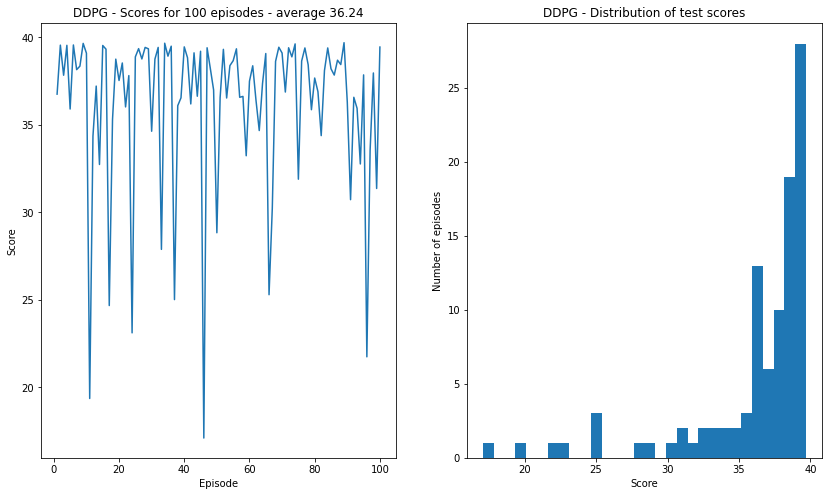

In [37]:
# Test agent results
df = pd.read_csv('Reacher_DDPG_Trained-test-results.csv')

print('Results running 100 epsiodes of trained DDPG agent\n')
print(f'The average score for 100 episodes is {round(df.score.mean(), 2)}')

plt.rcParams["figure.figsize"] = (14,8)

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.title('DDPG - 100 episodes of trained agent')
ax1.set_title(f'DDPG - Scores for 100 episodes - average {round(df.score.mean(), 2)}')
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode')

ax1.plot(range(1, len(df) +1), df.score)
ax2.set_title('DDPG - Distribution of test scores')
ax2.set_xlabel('Score')
ax2.set_ylabel('Number of episodes')
ax2.hist(df['score'], 30);



### Training the TD3 agent

In [ ]:
train_mode = True

name = 'Reacher_TD3'

env = UnityEnv('Reacher', '../../Reacher.app', train_mode=train_mode)
agent = TD3_Agent(name=name,
                  state_size=env.state_size,
                  action_size=env.action_size,
                  random_seed=2)

train_agent(env, agent, max_steps=int(1e6))


### View episode scores during training
The scores of episodes during training are stored in a csv, which can be loaded using pandas.


An average score of 30+ is achieved after 100000 steps


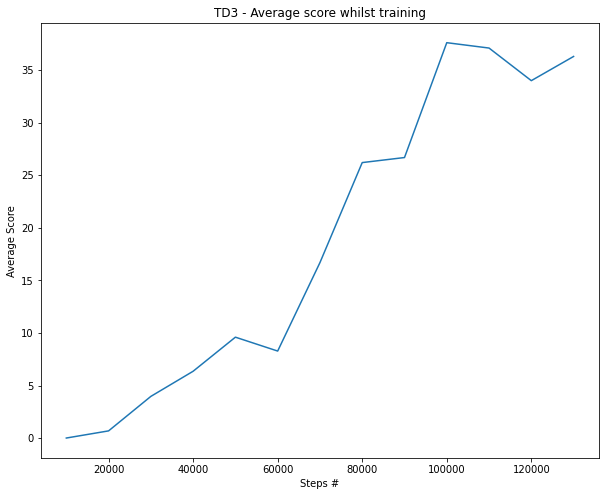

In [13]:

import pandas as pd

df = pd.read_csv('Reacher_TD3_Trained.csv')

first_row_solved = df[df['average_score'] > 30].iloc[0]
print(f'An average score of 30+ is achieved after {round(first_row_solved.steps)} steps')


plt.rcParams["figure.figsize"] = (10,8)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('TD3 - Average score whilst training')
plt.plot(df['steps'], df['average_score'])
plt.ylabel('Average Score')
plt.xlabel('Steps #')
plt.savefig('td3_learning_rate')

### Testing the TD3 agent

In [16]:
from run_agent import *

train_mode = False

name = 'Reacher_TD3_Trained'

env = UnityEnv('Reacher', '../../Reacher.app', train_mode=train_mode)
agent = TD3_Agent(name=name,
                   state_size=env.state_size,
                   action_size=env.action_size,
                   random_seed=2)

agent.load(filename=name)
n_episodes = 100
average_reward = eval_episodes(env, agent, num_episodes=n_episodes)
print(f'average score for {n_episodes} episodes is {average_reward}')



The scores of the test run are stored in a file of the agent's name + `test-results.csv`  

Results running 100 epsiodes of trained TD3 agent

The average score for 100 episodes is 36.92


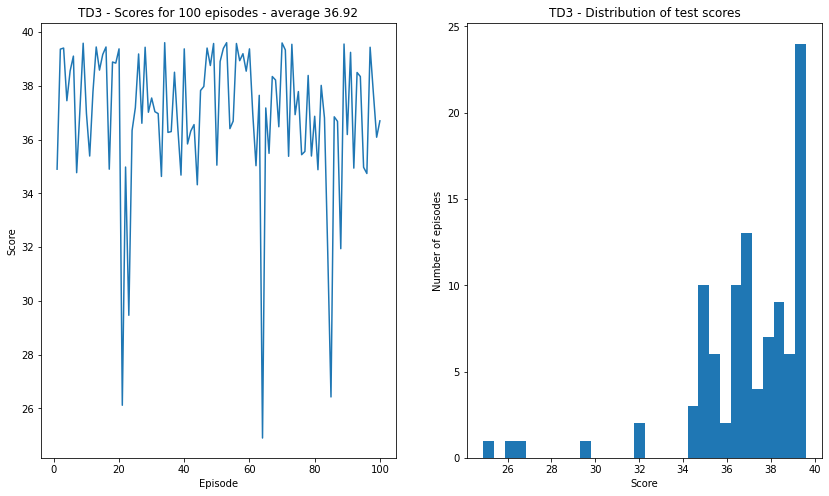

In [36]:
# Test agent results
df = pd.read_csv('Reacher_TD3_Trained-test-results.csv')

print('Results running 100 epsiodes of trained TD3 agent\n')
print(f'The average score for 100 episodes is {round(df.score.mean(), 2)}')

plt.rcParams["figure.figsize"] = (14,8)


fig, (ax1, ax2) = plt.subplots(1, 2)
plt.title('TD3 - 100 episodes of trained agent')
ax1.set_title(f'TD3 - Scores for 100 episodes - average {round(df.score.mean(), 2)}')
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode')

ax1.plot(range(1, len(df) +1), df.score)
ax2.set_title('TD3 - Distribution of test scores')
ax2.set_xlabel('Score')
ax2.set_ylabel('Number of episodes')
ax2.hist(df['score'], 30);


plt.savefig('td3_test_scores')